enter a number for the algorithms: 
1 - for logistic regression
2 - for naive bayes classification
3 or any other number - for random forest classifier
2
(30162,)
(30162, 96)
naive bayes
For noise level 0.00 %: 
accuracy = 0.76
recall = 0.02
precision = 1.00
f1 = 0.04
(30162,)
(30162, 96)
naive bayes
For noise level 10.00 %: 
accuracy = 0.76
recall = 0.02
precision = 1.00
f1 = 0.04
(30162,)
(30162, 96)
naive bayes
For noise level 30.00 %: 
accuracy = 0.76
recall = 0.02
precision = 1.00
f1 = 0.04
(30162,)
(30162, 96)
naive bayes
For noise level 50.00 %: 
accuracy = 0.76
recall = 0.02
precision = 1.00
f1 = 0.04
(30162,)
(30162, 96)
naive bayes
For noise level 70.00 %: 
accuracy = 0.75
recall = 0.02
precision = 1.00
f1 = 0.04
(30162,)
(30162, 96)
naive bayes
For noise level 90.00 %: 
accuracy = 0.75
recall = 0.02
precision = 1.00
f1 = 0.04


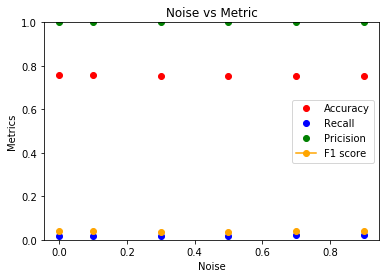

In [14]:
import numpy as np
import pandas as pd
import sklearn.metrics as sklm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import numpy.random as nr
import random
import sklearn.model_selection as ms
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from random import randint
from sklearn.preprocessing import StandardScaler
#read data
data1 = pd.read_csv('ml_data-2.csv')
#print(data.columns)
data1 = data1.replace('[?]', np.nan, regex = True)
#print(data1.isnull().sum())
data1.dropna(inplace = True)
#print(data1.isnull().sum())
num_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
cat_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
num_Features1 = np.array(data1[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])
cat_Features1 = np.array(data1[['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']])
labels1 = np.array(data1[['salary']])
#print(num_Features1, cat_Features1, labels1)


def modify_dataset(data):
    data1=data
    data1[['age','education-num','capital-gain','capital-loss','hours-per-week']] = StandardScaler().fit_transform(data1[['age','education-num','capital-gain','capital-loss','hours-per-week']])
    #data1= data1.replace('[?]', np.nan, regex=True)
    data1['sex']= data1['sex'].replace('Male', 1, regex=True)
    data1['sex']= data1['sex'].replace('Female', 0, regex=True)
    #data1.dropna(inplace=True)
    dummies1=pd.get_dummies(data1.workclass)
    dummies2=pd.get_dummies(data1.education)
    dummies3=pd.get_dummies(data1.marital_status)
    dummies4=pd.get_dummies(data1.occupation)
    dummies5=pd.get_dummies(data1.relationship)
    dummies6=pd.get_dummies(data1.race)
    dummies7=pd.get_dummies(data1.native_country)
    merged=pd.concat([data1,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7],axis=1)
    merged=merged.drop(['workclass', ' Without-pay', 'education', '9th', 'marital_status', ' Divorced', 'occupation', ' Other-service' ,'relationship', ' Not-in-family', 'race', ' Black', 'native_country', ' France'],axis=1)
    new=merged
    return new



def intr_noise_and_preprocess(num_Features, cat_Features, labels, frac):
    nr.seed(1234)
    index = range(num_Features.shape[0])
    #print(Features.shape[0])
    index = random.sample(range(num_Features.shape[0]), int(frac*float(num_Features.shape[0]))) 
    noise_data_num_x = num_Features[index, :]
    noise_data_cat_x = cat_Features[index, :]
    noise_data_y = np.array(labels[index])
    
    
    #noise for numerical data
    ## get description
    noise_data_num_x = pd.DataFrame(noise_data_num_x)
    desc = noise_data_num_x.describe()
    #print(desc)
    desc = np.array(desc)
    noise_data_num_x = np.array(noise_data_num_x)
    # pick standard dev from description for each column 
    stds = desc[3, :]
    for i in range(len(noise_data_num_x)):                           #iterate over rows
        for j, std in enumerate(stds):                           #iterate over each column
            w = random.uniform(-std,std)
            noise_data_num_x[i, j] = noise_data_num_x[i, j] + w          #add random num from (-std, std) to existing data
    data_num_x = np.vstack((num_Features, noise_data_num_x))
    
    
    
    ###noise for categorical data
    #print(labels.shape, noise_data_y.shape)
    noise_data_cat_x_pd = pd.DataFrame(noise_data_cat_x)
    cat_Features_pd = pd.DataFrame(cat_Features)
    for i in range(len(noise_data_cat_x)):
        for j, col in enumerate(cat_Features_pd.columns):
            unique = np.array(cat_Features_pd[col].unique())
            #print(cat_Features_pd[col].value_counts(), unique, unique.dtype, len(unique))
            w = randint(0,len(unique) - 1)
            while True:
                if unique[w] == noise_data_cat_x[i, j]:
                    w = randint(0, len(unique) - 1)
                else:
                    break;
            #print(noise_data_cat_x[i, j])
            noise_data_cat_x[i, j] = unique[w]
            #print(noise_data_cat_x[i, j])
    #print(noise_data_cat_x)
    #print(noise_data_cat_x.describe())
    data_cat_x = np.vstack((cat_Features, noise_data_cat_x))
    data_y = np.vstack((labels, noise_data_y))
    data_x = np.column_stack((data_num_x, data_cat_x))
    data_noise = np.column_stack((data_x, data_y))
    data_noise = pd.DataFrame(data_noise)
    #print(data_noise.shape)
    df = shuffle(data_noise)
    df = df.sample(n = 30162)
    data = pd.DataFrame(df.values, columns = ['age', 'fnlwgt', 'education-num',
       'capital-gain', 'capital-loss', 'hours-per-week', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'native_country', 'salary'])
    data_proc = modify_dataset(data)
    return data_proc
#df = intr_noise_and_preprocess(num_Features1, cat_Features1, labels1, noise)

#
def naive_bayes(Features, labels):
    labels = list(labels)
    clf=GaussianNB()
    acc = cross_val_score(clf, Features, labels, cv = 10, scoring = 'accuracy')
    pr = cross_val_score(clf, Features, labels, cv = 10, scoring = 'precision')
    rc = cross_val_score(clf, Features, labels, cv = 10,scoring = 'recall')
    f1 = cross_val_score(clf, Features, labels, cv = 10, scoring = 'f1')

    #clf.fit(x_train, y_train)
    #y_hat_p = clf.predict_proba(x_test)  #score model based on threshold
    #y_hat = score_model(y_hat_p, 0.5)
    return acc, pr, rc, f1


def random_forest_classifier(Features, labels):
    labels = list(labels)
    clf = RandomForestClassifier(bootstrap= True, max_depth = 100, n_estimators = 50)
   
    #param_grid = {'bootstrap': [True],
    #    'max_depth': [50, 75, 100],
    #    'max_features': [2, 3],
    #    'min_samples_leaf': [3, 4, 5],
    #    'min_samples_split': [8, 10, 12],
    #    'n_estimators': [10, 30, 50]}
    #gridsearch = GridSearchCV(estimator = clf, param_grid=param_grid, cv = 5, n_jobs = -1, verbose = 2)
    #gridsearch.fit(Features, labels)
    #print(gridsearch.best_params_)
    #print("stop")
   
    acc = cross_val_score(clf, Features, labels, cv = 10, scoring = 'accuracy')
    pr = cross_val_score(clf, Features, labels, cv = 10, scoring = 'precision')
    rc = cross_val_score(clf, Features, labels, cv = 10,scoring = 'recall')
    f1 = cross_val_score(clf, Features, labels, cv = 10, scoring = 'f1')

    #clf.fit(x_train, y_train)
    #y_hat_p = clf.predict_proba(x_test)  #score model based on threshold
    #y_hat = score_model(y_hat_p, 0.5)
    return acc, pr, rc, f1


#apply logistic
def logistic_regression(Features, labels):
    labels = list(labels)
   
    
    clf=LogisticRegression(class_weight='balanced', C = 100, penalty = 'l1')
    #param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
    #gridsearch = GridSearchCV(clf, param_grid, cv = 10)
    #gridsearch.fit(Features, labels)
    #print(gridsearch.best_params_)
    
    acc = cross_val_score(clf, Features, labels, cv = 10, scoring = 'accuracy')
    pr = cross_val_score(clf, Features, labels, cv = 10, scoring = 'precision')
    rc = cross_val_score(clf, Features, labels, cv = 10,scoring = 'recall')
    f1 = cross_val_score(clf, Features, labels, cv = 10, scoring = 'f1')

    #clf.fit(x_train, y_train)
    #y_hat_p = clf.predict_proba(x_test)  #score model based on threshold
    #y_hat = score_model(y_hat_p, 0.5)
    return acc, pr, rc, f1

def calc_npv(y_true, y_pred):
    cfmat = sklm.confusion_matrix(y_true, y_pred)
    metrics = sklm.precision_recall_fscore_support(y_true, y_pred)
    print("                     Predicted Positive        Predicted Negative")
    print("Actually Positive    %6d" %cfmat[0][0] + "                  %6d" %cfmat[0][1])
    print("Actually Negative    %6d" %cfmat[1][0] + "                  %6d" %cfmat[1][1])
    print("")
    #print("Accuracy: " + str(sklm.accuracy_score(y_true, y_predicted)))
    #print("")
    print("            Positive       Negative")
    print("Num Cases:  %6f"%metrics[3][0] + "          %6.2f"%metrics[3][1])
    print("precision:  %6.2f"%metrics[0][0] + "          %6.2f"%metrics[0][1])
    print("Recall:     %6.2f"%metrics[1][0] + "          %6.2f"%metrics[1][1])
    return metrics[1][1]
def calc_specificity(y_true, y_pred):
    cfmat = sklm.confusion_matrix(y_true, y_pred)
    metrics = sklm.precision_recall_fscore_support(y_true, y_pred)
    print("                     Predicted Positive        Predicted Negative")
    print("Actually Positive    %6d" %cfmat[0][0] + "                  %6d" %cfmat[0][1])
    print("Actually Negative    %6d" %cfmat[1][0] + "                  %6d" %cfmat[1][1])
    print("")
    #print("Accuracy: " + str(sklm.accuracy_score(y_true, y_predicted)))
    #print("")
    print("            Positive       Negative")
    print("Num Cases:  %6f"%metrics[3][0] + "          %6.2f"%metrics[3][1])
    print("precision:  %6.2f"%metrics[0][0] + "          %6.2f"%metrics[0][1])
    print("Recall:     %6.2f"%metrics[1][0] + "          %6.2f"%metrics[1][1])
    print("Specificity %.2f" %metrics[0][1] + " npv %.2f" %metrics[1][1])
    print("")
    return metrics[0][1]

print("enter a number for the algorithms: ")
print("1 - for logistic regression")
print("2 - for naive bayes classification")
print("3 or any other number - for random forest classifier")
choice=int(input())
for i, noise in enumerate([0, 0.1, 0.3, 0.5, 0.7, 0.9]):
    #df1 = df
    df1 = intr_noise_and_preprocess(num_Features1, cat_Features1, labels1, noise)
    labels = np.ravel(df1['salary'])
    print(labels.shape)
    df1 = df1.drop(['salary'], axis = 1)  #drop salary feature
    #print(df.head())
    
    Features = np.array(df1)
    print(Features.shape)
    #split data randomly into test and train

    nr.seed(9988+i)
    #choice = 1
    if choice == 1:
        print ("logistic regression")
        acc, pr, rc, f1 = logistic_regression(Features, labels)
    if choice == 2:
        print("naive bayes")
        acc, pr, rc, f1 = naive_bayes(Features, labels)
    if choice == 3:
        print("random forest")
        acc, pr, rc, f1 = random_forest_classifier(Features, labels)
    print("For noise level %.2f %%: "%(noise*100))
    print("accuracy = %.2f" %np.mean(acc))
    print("recall = %.2f" %np.mean(rc))
    print("precision = %.2f" %np.mean(pr))
    print("f1 = %.2f" %np.mean(f1))
    #p, r = print_metrics(y_test, y_hat)
    if i == 0:
        plt.plot(noise, np.mean(acc), 'ro', label = 'Accuracy')
        plt.plot(noise, np.mean(rc), 'bo', label = 'Recall')
        plt.plot(noise, np.mean(pr), 'go', label = 'Pricision')
        plt.plot(noise, np.mean(f1), 'orange', marker = 'o', label = 'F1 score')
    else:
        plt.plot(noise, np.mean(acc), 'ro')
        plt.plot(noise, np.mean(rc), 'bo')
        plt.plot(noise, np.mean(pr), 'go')
        plt.plot(noise, np.mean(f1), color='orange', marker='o')
plt.xlabel('Noise')
plt.ylabel('Metrics')
plt.title('Noise vs Metric')
#plt.title('Noise vs Metric for Random Forest classifier')
#plt.title('Noise vs Metric for naive_bayes classifier')
#plt.xlim((0,1))
plt.ylim((0,1))
plt.legend()
plt.show()